<a href="https://colab.research.google.com/github/Pavti7/DATA_Pawel_A/blob/main/Machine_Learning/Klasyfikacja/4_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naiwny klasyfikator bayesowski

ZADANIE:

Wyobraźmy sobie test na chorobę X. Testy wykrywa prawdidłowo 90% chorych, ale jeśli testowi poddaje się osoba zdrowa myli się w 30% przypadków. Choroba X dotyka średnio 10% populacji. 

Jakie jest prawdodpodobieństwo, że osoba, która poddała się testowi i otrzymała wynik pozytywny (chora), jest zdrowa?

##P(A|B) = (P(B|A) * P(A)) / P(B)

P(A|B) - prawdopodobieństwo zdarzenia A (zdrowa) przy zdarzeniu B (pozytywny wynikak testu)
P(B|A) - prawdopodobieństwo, że test dał pozytywny wynik jeśli osoba jest zdrowa = 0.3
P(A) - prawdopodobieństwo, że osoba jest zdrowa = 0.9

P(B) - prawdopobieństwo, że test dał pozytywny wynik.

P(B)

10 osób na 100 jest chorych. Spośród chorych, 9 osób otrzyma pozytwyny wynik testu.
90 osób jest zdrowych. Spośród zdrowych, 27 osób otrzyma pozytywny wynik testu.

36 osób otrzyma pozytywny wynik testu (będzie zaklasyfikowane jako chore)

In [1]:
0.3*0.9/0.36

0.7500000000000001

## Budowa modelu na danych rzeczywistych

Po pierwsze, musimy zaimportować dane. Pobierzmy sobie zatem zbiory z githuba.

In [23]:
!git clone https://github.com/matzim95/ML-datasets


fatal: destination path 'ML-datasets' already exists and is not an empty directory.


In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'/content/ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

### Wczytanie zbioru

Glass

In [40]:
glass, glass_classes = load_dataset('glass', 'Type', 'ID')

In [41]:
print(glass_classes)

glass.head()

['building_windows_float_processed' 'building_windows_non_float_processed'
 'vehicle_windows_float_processed' 'containers' 'tableware' 'headlamps']


,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,class
ID,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,0


Wine

### Normalizacja / standaryzacja

In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standarizer = StandardScaler()
minmax = MinMaxScaler()

In [43]:
y = glass.pop('class')
X = glass

glass.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [44]:
X_minmax = X.copy()

minmax.fit(X)
X_matrix = minmax.transform(X)

X_minmax[:] = X_matrix

In [45]:
X_minmax.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
X_standarize = X.copy()
standarizer = StandardScaler()

display(X_standarize.head())

standarizer.fit(X_standarize)
X_matrix = standarizer.transform(X_standarize)

X_standarize[:] = X_matrix

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
ID,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [47]:
X_standarize.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.877034e-14,2.191393e-15,-1.328117e-16,-2.988264e-16,9.525091e-16,3.527811e-17,-3.154278e-16,-6.640586e-17,-3.735330e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


Możemy już przejść do zdefiniowania modelu i jego walidacji

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

#Modele na danych normalizowanych MinMaxScalerem

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, stratify = y, random_state = 30)

In [50]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

for classifier in [MultinomialNB(), GaussianNB(), BernoulliNB()]:

  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  print_results(calculate_metrics(y_test, y_pred), classifier_id = str(classifier))


Results for MultinomialNB()
----
  Accuracy:  0.42592592592592593
  Precision: 0.31140350877192985
  Recall:    0.22928849902534112
  F1 score:  0.22145467836257313
  Mislabeled 31 out of 54


Results for GaussianNB()
----
  Accuracy:  0.2777777777777778
  Precision: 0.49313725490196075
  Recall:    0.47819200779727095
  F1 score:  0.41675020885547204
  Mislabeled 39 out of 54


Results for BernoulliNB()
----
  Accuracy:  0.46296296296296297
  Precision: 0.2871794871794872
  Recall:    0.32115009746588696
  F1 score:  0.30128205128205127
  Mislabeled 29 out of 54




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Model na zbiorze wine

In [51]:
wine, wine_classes = load_dataset('wine', 'Class')
print(wine_classes)
wine.head()

['one' 'two' 'three']


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [52]:
y = wine.pop('class')
X = wine

In [53]:
X_minmax = X.copy()

minmax.fit(X)
X_matrix = minmax.transform(X)

X_minmax[:] = X_matrix

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, stratify = y, random_state = 30)

In [55]:
gbc = GaussianNB()
gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

print_results(calculate_metrics(y_test, y_pred))

Results for classifier
----
  Accuracy:  0.9777777777777777
  Precision: 0.9791666666666666
  Recall:    0.9814814814814815
  F1 score:  0.9797235023041475
  Mislabeled 1 out of 45




<bound method _AxesBase.set_xticklabels of <Axes: >>

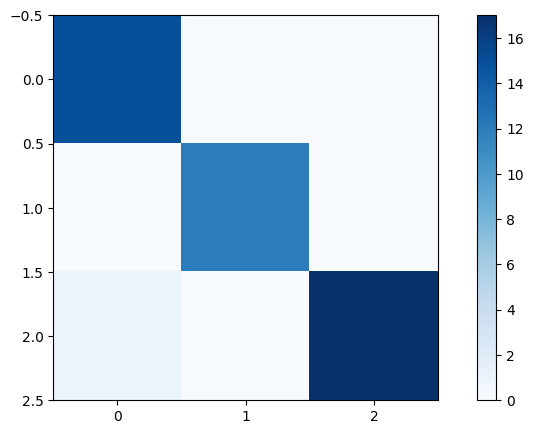

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (10,5))

img = ax.imshow(cm, cmap = plt.cm.Blues)

ax.figure.colorbar(img, ax = ax)

ax.set_xticks(np.arange(cm.shape[1]))
ax.set_xticklabels

In [57]:
cm.shape[1]

3

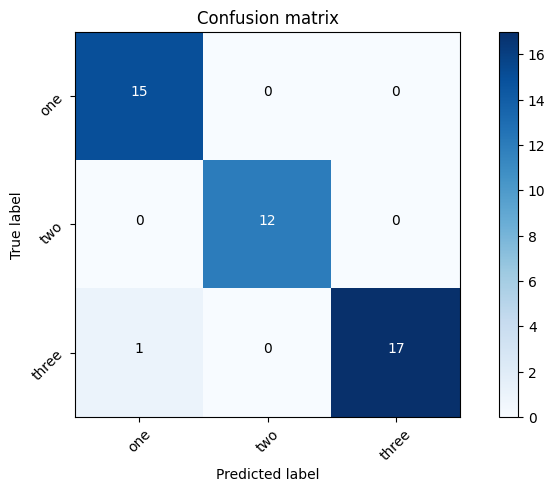

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize = (10,5))

img = ax.imshow(cm, cmap = plt.cm.Blues)

ax.figure.colorbar(img, ax = ax)

ax.set_xticks(np.arange(cm.shape[1]))
ax.set_xticklabels(wine_classes, rotation = 45)

ax.set_yticks(np.arange(cm.shape[0]))
ax.set_yticklabels(wine_classes, rotation = 45)

ax.set_title('Confusion matrix')
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')

for y, row in enumerate(cm):
  for x, cell in enumerate(row):
    ax.text(x,y, format(cell, 'd'), ha ='center', color = 'white' if cell > cm.max()/2 else 'black')

In [59]:
def plot_confusion_matrix(cm, classes, title=None, title_appendix = '', cmap = plt.cm.Blues):

  # Obsługa tytułu
  if title_appendix:
    title_appendix = f'({title_appendix})'
  
  if title is None:
    title = f'Confusion Matrix {title_appendix}'

  fig, ax = plt.subplots(figsize = (10,5))

  img = ax.imshow(cm, cmap = cmap)

  ax.figure.colorbar(img, ax = ax)

  ax.set_xticks(np.arange(cm.shape[1]))
  ax.set_xticklabels(classes, rotation = 45)

  ax.set_yticks(np.arange(cm.shape[0]))
  ax.set_yticklabels(classes, rotation = 45)

  ax.set_title(title)
  ax.set_ylabel('True label')
  ax.set_xlabel('Predicted label')

  for y, row in enumerate(cm):
    for x, cell in enumerate(row):
      ax.text(x,y, format(cell, 'd'), ha ='center', color = 'white' if cell > cm.max()/2 else 'black')

  fig.tight_layout()

  return ax

<Axes: title={'center': 'Confusion Matrix (GNB)'}, xlabel='Predicted label', ylabel='True label'>

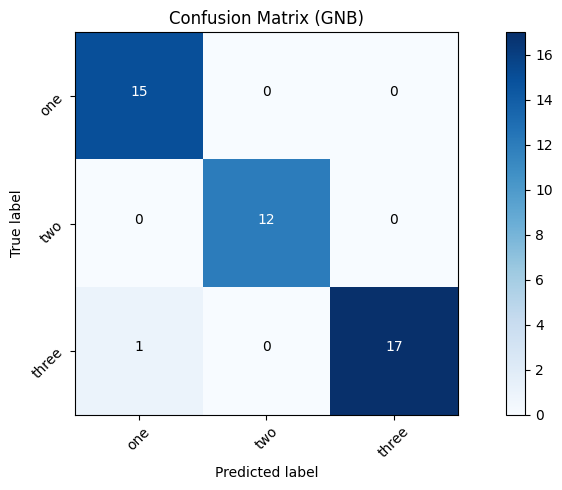

In [60]:
plot_confusion_matrix(cm, wine_classes, title_appendix = 'GNB')

Ten (blok powyżej) sposób porównywania nie jest zbyt czytelny, dlatego stosujemy metryki oraz macierze błędów. Przygotujmy funkcję:

A na co się przydaje ta dyskretyzacja? Sprawdźmy!

In [62]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


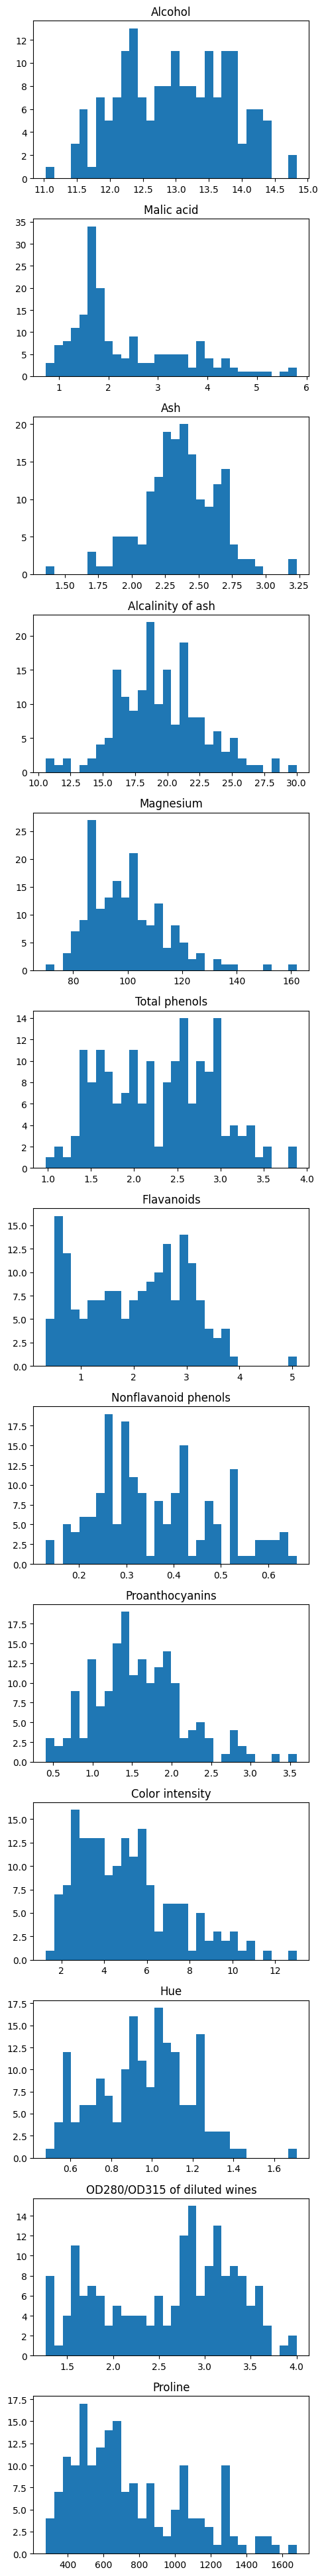

In [63]:
fig, axs = plt.subplots(len(X.columns), figsize = (5, len(X.columns)*3))

for index, column in enumerate(X):
  axs[index].hist(X[column], bins = 30)
  axs[index].set_title(column)
plt.tight_layout()
plt.show()

Zdefiniujmy sobie różne funkcje do dyskretyzacji, korzystając z pandasowych:
* pd.cut()
* pd.qcut()

In [68]:
pd.cut(X['Alcohol'], bins = 3).value_counts()

(12.297, 13.563]    86
(13.563, 14.83]     51
(11.026, 12.297]    41
Name: Alcohol, dtype: int64

In [70]:
pd.qcut(X['Alcohol'], q = 3).value_counts()

(11.029, 12.52]    60
(12.52, 13.48]     59
(13.48, 14.83]     59
Name: Alcohol, dtype: int64

In [72]:
indices, bins = pd.cut(X['Alcohol'], 5, retbins = True, labels = False, duplicates = 'drop')

In [73]:
indices

0      4
1      2
2      2
3      4
4      2
      ..
173    3
174    3
175    2
176    2
177    4
Name: Alcohol, Length: 178, dtype: int64

In [74]:
bins

array([11.0262, 11.79  , 12.55  , 13.31  , 14.07  , 14.83  ])

Funkcje przeprowadzające kategoryzację:

In [75]:
def equal_lenght(column, n_bins):
  indices, bins = pd.cut(column, n_bins, retbins = True, labels = False, duplicates = 'drop')

  return indices.map(dict(enumerate(bins)))

lenght_bin = lambda x: equal_lenght(x, 5)

In [76]:
X_l = X.apply(lenght_bin)

In [78]:
X_l.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.07,0.73494,2.108,14.4800,125.2,2.72,2.236,0.236,1.678,3.624,0.972,3.454,838.8
1,12.55,1.75200,2.108,10.5806,88.4,2.14,2.236,0.236,1.044,3.624,0.972,2.908,838.8
2,12.55,1.75200,2.482,18.3600,88.4,2.72,3.184,0.236,2.312,3.624,0.972,2.908,1119.2
3,14.07,1.75200,2.482,14.4800,106.8,3.30,3.184,0.236,1.678,5.968,0.726,2.908,1399.6
4,12.55,1.75200,2.856,18.3600,106.8,2.72,2.236,0.342,1.678,3.624,0.972,2.908,558.4


In [79]:
def equal_frequency(column, n_bins):
  indices, bins = pd.qcut(column, n_bins, retbins = True, labels = False, duplicates = 'drop')

  return indices.map(dict(enumerate(bins)))

freq_bin = lambda x: equal_frequency(x, 5)

In [80]:
X_f = X.apply(freq_bin)

X_f.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.756,1.510,2.42,10.60,111.0,2.53,2.98,0.26,1.986,5.284,0.91,3.260,1048.0
1,12.760,1.730,1.36,10.60,94.8,2.53,2.46,0.13,1.104,4.080,1.04,3.260,1048.0
2,12.760,2.134,2.61,18.58,94.8,2.53,2.98,0.26,1.986,5.284,0.91,2.902,1048.0
3,13.756,1.730,2.42,10.60,111.0,2.86,2.98,0.13,1.986,6.990,0.74,3.260,1048.0
4,12.760,2.134,2.61,20.00,111.0,2.53,2.46,0.30,1.664,4.080,0.91,2.902,605.6


## Granice decyzyjne na sztucznie wygenerowanym zbiorze:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))

train_labels = np.hstack((np.zeros(100), np.ones(100)))


# np.vstack - połaczenie tablic wertykalne
# np.hstack - połączenie tablic horyzontalne

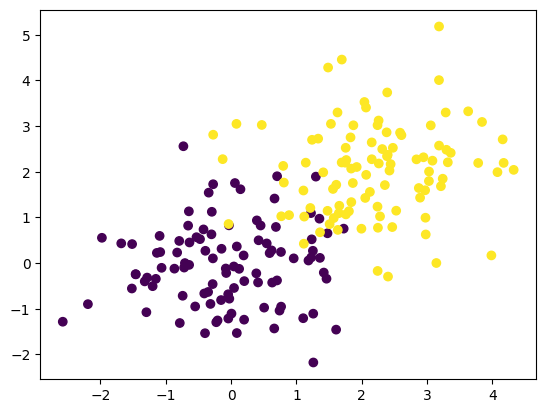

In [2]:
fig, ax = plt.subplots()

ax.scatter(train_data[:,0], train_data[:,1], c =train_labels)

In [3]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
model = GaussianNB()
model.fit(train_data, train_labels)

GaussianNB()

In [4]:
x_min, x_max = train_data[:,0].min() -1, train_data[:,0].max() +1
y_min, y_max = train_data[:,1].min() -1, train_data[:,1].max() +1

xs, ys = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

y_pred = model.predict(np.column_stack((xs.flatten(),
                                       ys.flatten())))

In [5]:
y_pred_matrix = y_pred.reshape(xs.shape)

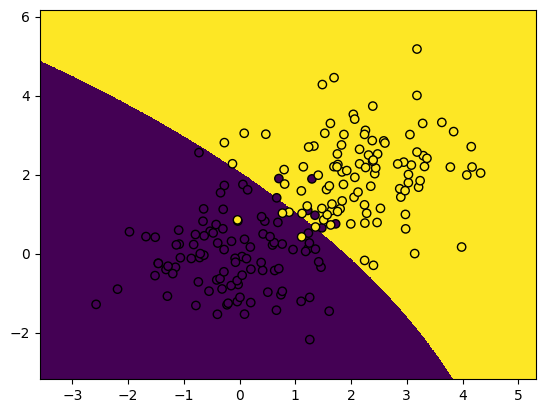

In [6]:
fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, y_pred_matrix)
ax.scatter(train_data[:,0], train_data[:,1], c=train_labels, edgecolors = 'k')
plt.show()